In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
%cd MyDrive

/content/drive/MyDrive


In [5]:
%cd Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [9]:
golf = pd.read_csv('pga.Level.csv')
golf.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401353224,9261,288,289,60.0,51.1,56,3,7.6,...,12.0,2022,0,T32,0.20,-0.13,-0.08,0.86,0.65,0.85
1,A. Hadwin,401353224,5548,288,286,72.5,61.5,61,8,13.0,...,12.0,2022,0,T18,0.36,0.75,0.31,0.18,1.24,1.60
2,A. Lahiri,401353224,4989,144,147,21.5,17.4,27,0,0.0,...,12.0,2022,0,CUT,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,A. Long,401353224,6015,144,151,20.5,13.6,17,0,0.4,...,12.0,2022,0,CUT,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,A. Noren,401353224,3832,144,148,23.5,18.1,23,0,1.2,...,12.0,2022,0,CUT,0.53,-0.36,-1.39,0.19,-1.56,-1.04


### Intro


Golf has been one of the most popular sports around the world, becoming a hobby for many people as they get older in age. Since one of the biggest tournaments of the year was very recent I thought about doing this project on the PGA Tour. This dataset is all the raw data of tournaments from 2015-2022. For this project, I decided to find my favorite players scores, my favorite tournament's scores and how much the top 10 players made throughout the years.

### Analysis

In [10]:
masters = golf[golf['tournament name'] == 'Masters Tournament']

In [11]:
average_strokes_by_year = masters.groupby('season')['strokes'].mean()

### Average Stokes From 2015-2022 at the Masters


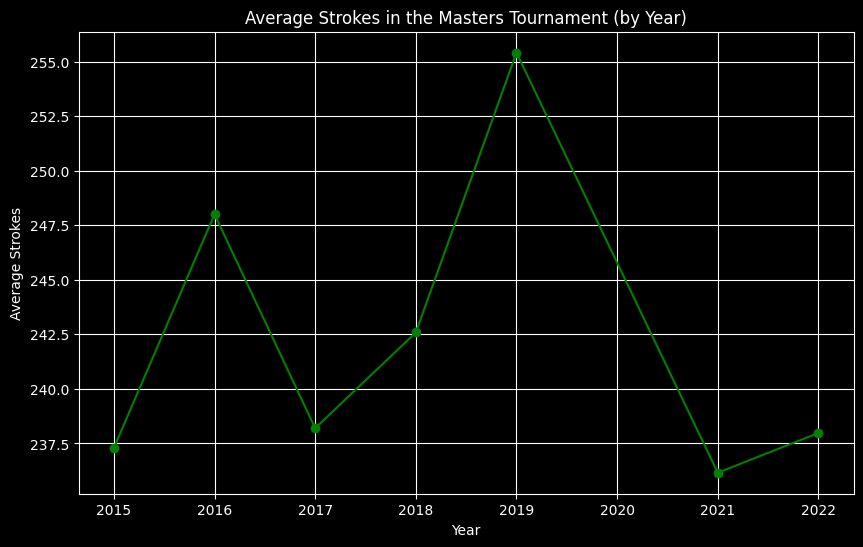

In [12]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))

average_strokes_by_year.plot(color='green', marker='o', linestyle='-')

plt.title('Average Strokes in the Masters Tournament (by Year)')
plt.xlabel('Year')
plt.ylabel('Average Strokes')

plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Since the Masters is one of the biggest tournaments of the year I decided to find the strokes that all they players had on average. The par on the course is 288 which was slightly skewed due to some people withdrawing or missing the cut. It was very interesting to see the graph move up and down. If I had access to the weather during these tournaments I could make an observation on why these scored are like this.

### The Top 10 Players Based off Wins from 2015-2022

In [13]:
most_wins = golf[golf['pos'] == 1].groupby('player').size()
top_players = most_wins.sort_values(ascending=False)
top_10_players = top_players[:10]

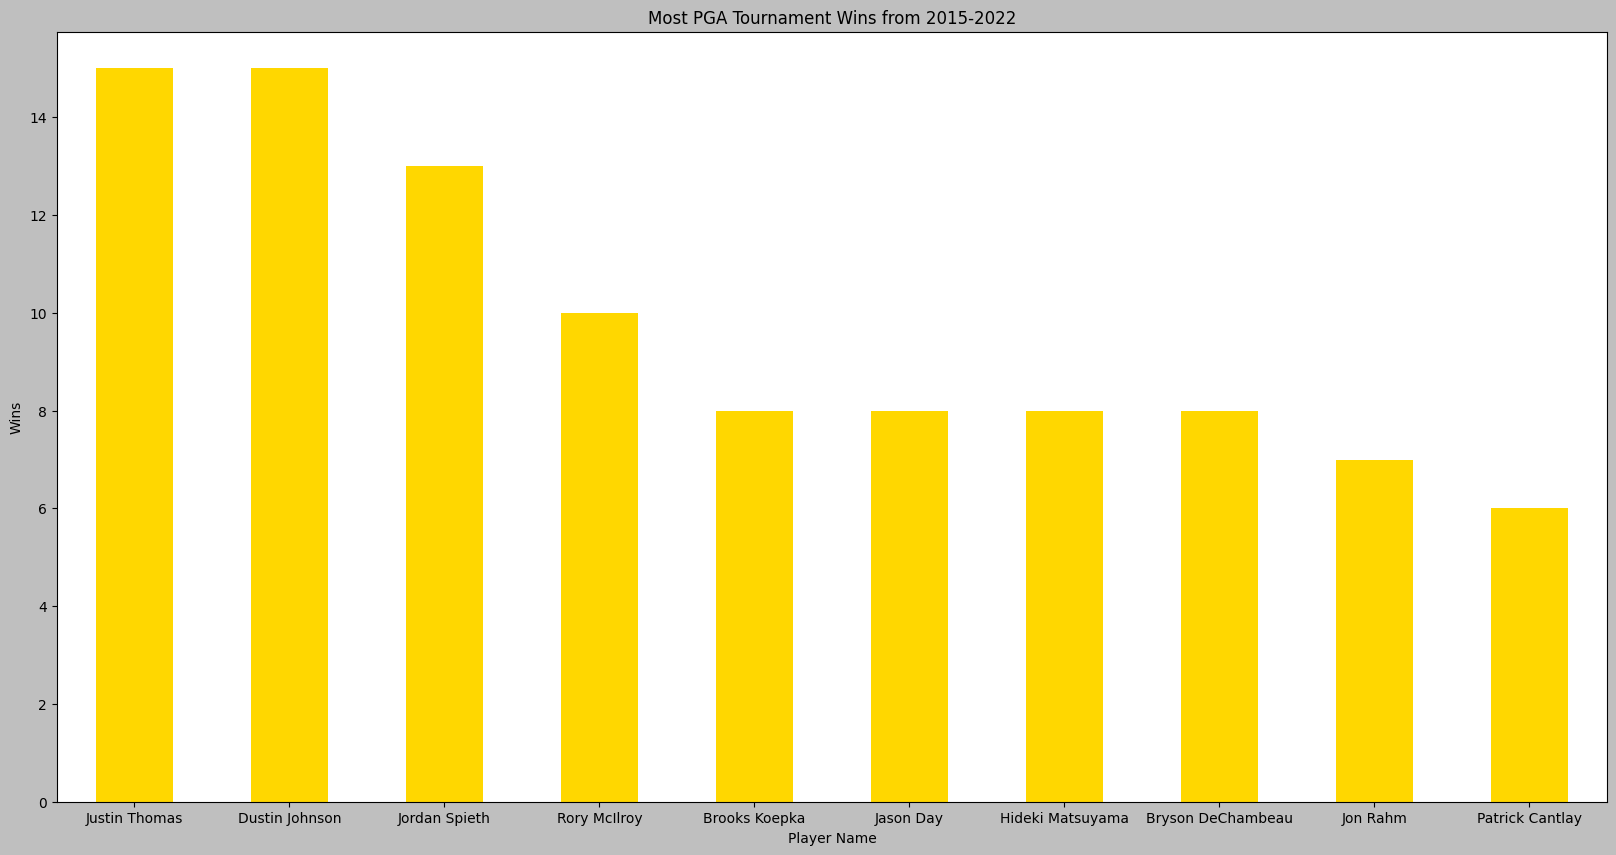

In [14]:
plt.style.use('grayscale')
plt.figure(figsize=(20, 10))

top_10_players.plot(kind='bar', color='gold')

plt.title('Most PGA Tournament Wins from 2015-2022')
plt.xlabel('Player Name')
plt.ylabel('Wins')

plt.xticks(rotation=0)
plt.show()

Since 2022 was two years ago now I was very curious of what players were tearing up the PGA tour during the 7 years. So I decided to make a bar graph to show what players had the most wins on the tour during this time and to my surprise only one player is currently still winning a lot on the tour. A lot can change in two years.

### Three Players Strokes Gained from 2015-2022

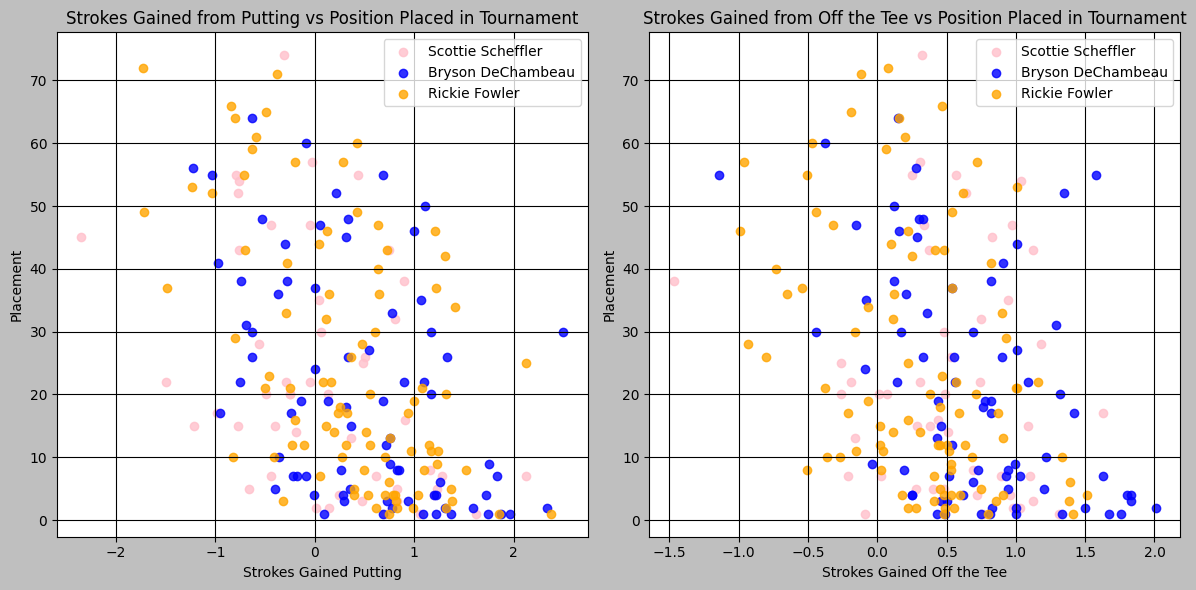

In [15]:
plt.style.context('Solarize_Light2')


Scottie = golf[golf['player'] == 'Scottie Scheffler']
Bryson = golf[golf['player'] == 'Bryson DeChambeau']
Rickie = golf[golf['player'] == 'Rickie Fowler']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.scatter(Scottie['sg_putt'], Scottie['pos'], marker='o', c='pink', alpha=0.8, label='Scottie Scheffler')
ax1.scatter(Bryson['sg_putt'], Bryson['pos'], marker='o', c='blue', alpha=0.8, label='Bryson DeChambeau')
ax1.scatter(Rickie['sg_putt'], Rickie['pos'], marker='o', c='orange', alpha=0.8, label='Rickie Fowler')

ax1.set_title('Strokes Gained from Putting vs Position Placed in Tournament')
ax1.set(xlabel='Strokes Gained Putting', ylabel='Placement')

ax1.legend()
ax1.grid(True)

ax2.scatter(Scottie['sg_ott'], Scottie['pos'], marker='o', c='pink', alpha=0.8, label='Scottie Scheffler')
ax2.scatter(Bryson['sg_ott'], Bryson['pos'], marker='o', c='blue', alpha=0.8, label='Bryson DeChambeau')
ax2.scatter(Rickie['sg_ott'], Rickie['pos'], marker='o', c='orange', alpha=0.8, label='Rickie Fowler')

ax2.set_title('Strokes Gained from Off the Tee vs Position Placed in Tournament')
ax2.set(xlabel='Strokes Gained Off the Tee', ylabel='Placement')

ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()



This scatter plot was my favorite to do, so stroke gained is basically how much better the shot is from an average shot. So say Scottie Scheffler hits his driver in a perfect spot to give himself an easier approach shot, his stokes gained off the tee will become positive. This is a really interesting stat that I love, that is why I paired it with where each player placed when they have positive or negative strokes gained. I chose my three favorite players on the tour.

### Percent of People Who made Cut from 2015-2022

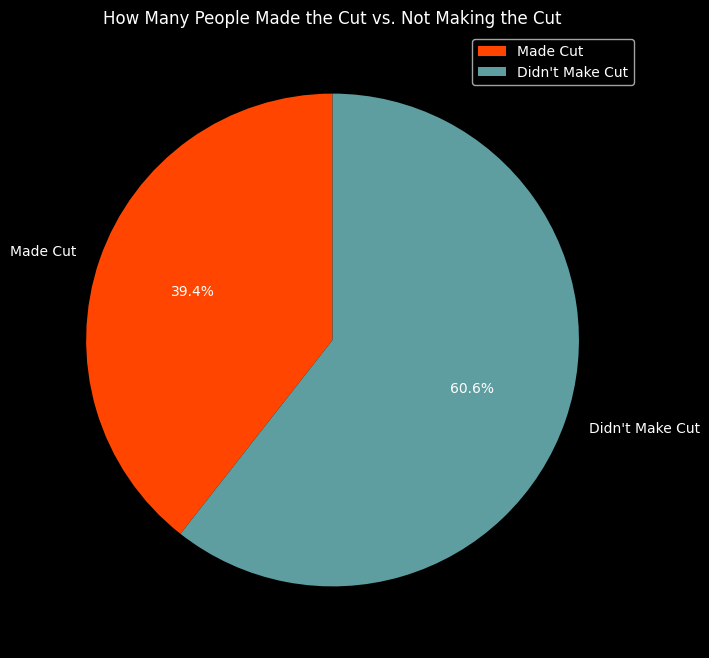

In [16]:
plt.style.use('dark_background')

made_cut = golf['made_cut'].value_counts().sort_index()

labels = ['Made Cut', "Didn't Make Cut"]

colors = ['orangered', 'cadetblue']

plt.figure(figsize=(8, 8))
plt.pie(made_cut, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('How Many People Made the Cut vs. Not Making the Cut')
plt.legend(loc='upper right')


Have you ever wondered how many people make the cut each tournament? I think about this every tournament that I watch, that is why I chose to make a pie chart to see how many people really do make the cut line. It is really cool to see that it is harder to make the cut line then it's not. While watching It usually feels like a lot more people make the cut then doesn't which is why this is interesting.

### Average Strokes in 2022

In [17]:
golf['date'] = pd.to_datetime(golf['date'])
tournaments_2022 = golf[golf['date'].dt.year == 2022]
tournament_names_2022 = tournaments_2022['tournament name'].unique()
average_strokes_by_tournament = tournaments_2022.groupby('tournament name')['strokes'].mean()


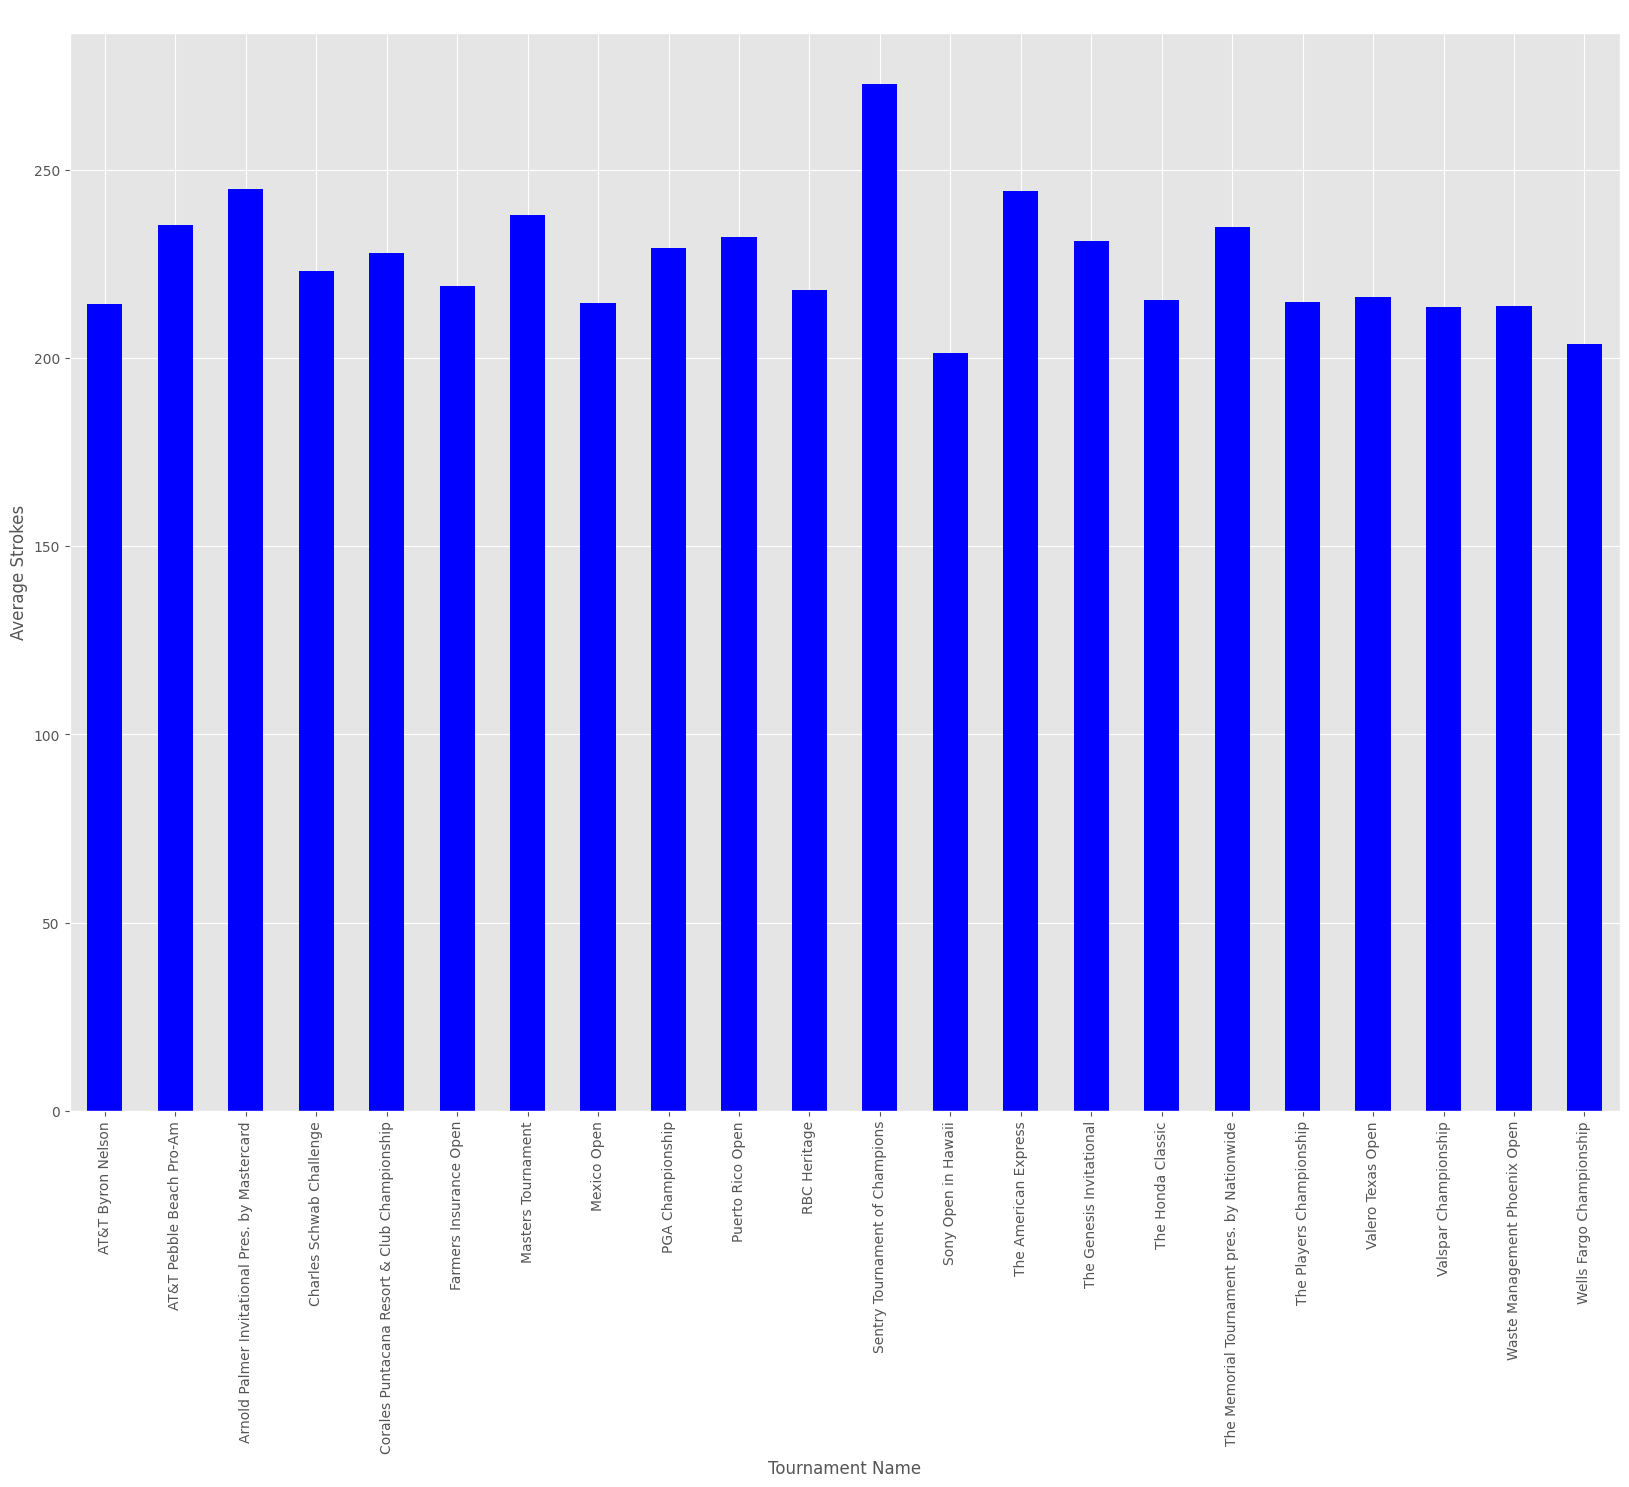

In [18]:
plt.style.use('ggplot')

plt.figure(figsize=(20, 14))

average_strokes_by_tournament.plot(kind='bar', color= 'blue')
plt.title('Average Strokes by Tournament in 2022')
plt.xlabel('Tournament Name')
plt.ylabel('Average Strokes')
plt.show()

Although I already did the average strokes for the Masters I was really tempted to do that for all the tournaments, but since that would not look good on a chart I did 2022. Like I said earlier it interests me which tournaments are the hardest; and from the looks at the graph it seems like the Sentry Tournament of Champions was the hardest tournament of the year.

### Top 10 Players Earned from 2015-2022

In [19]:
top_players_data = golf[golf['player'].isin(top_10_players.index)]
money_earned_by_player = top_players_data.groupby('player')['purse'].sum()


Text(0.5, 1.0, 'Total Money Earned by Top 10 Players')

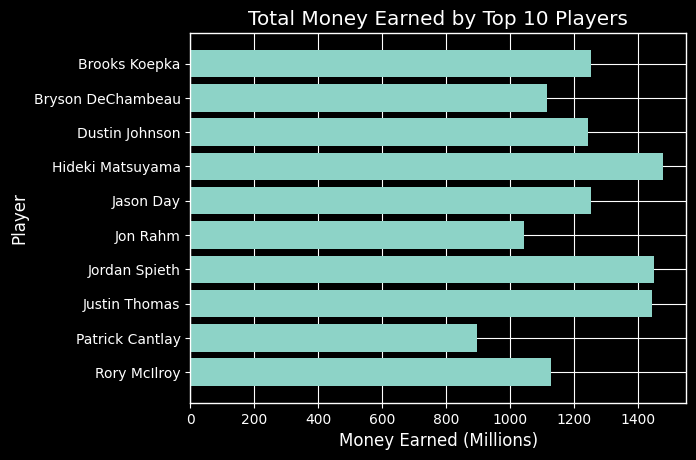

In [20]:
plt.style.use('dark_background')
fig, ax = plt.subplots()
ax.barh(money_earned_by_player.index, money_earned_by_player.values, align='center')


ax.invert_yaxis()

ax.set_xlabel('Money Earned (Millions)')
ax.set_ylabel('Player')
ax.set_title('Total Money Earned by Top 10 Players')

I was conflicted on what to do for this one, and I decided to base it on something I had already done. The PGA over the past couple years has had conflict with LIV golf with is a golf league based out of Saudi Arabia. LIV has stolen many of the top players over the past couple years due to their massive contracts, offering up a billion dollars to Tiger Woods. So I truly wanted to see how much money these top 10 players over the span of 7 years were making. Which if you look at it, it is truly amazing how much these golfers make.

In [21]:
masters = golf[golf['tournament name'] == 'Masters Tournament']
pga_championship = golf[golf['tournament name'] == 'PGA Championship']
the_open= golf[golf['tournament name'] == 'The Open']
us_open = golf[golf['tournament name'] == 'U.S. Open']

sg_total_masters = masters.groupby('season')['sg_total'].mean()
sg_total_pga = pga_championship.groupby('season')['sg_total'].mean()
sg_total_open = the_open.groupby('season')['sg_total'].mean()
sg_total_us = us_open.groupby('season')['sg_total'].mean()

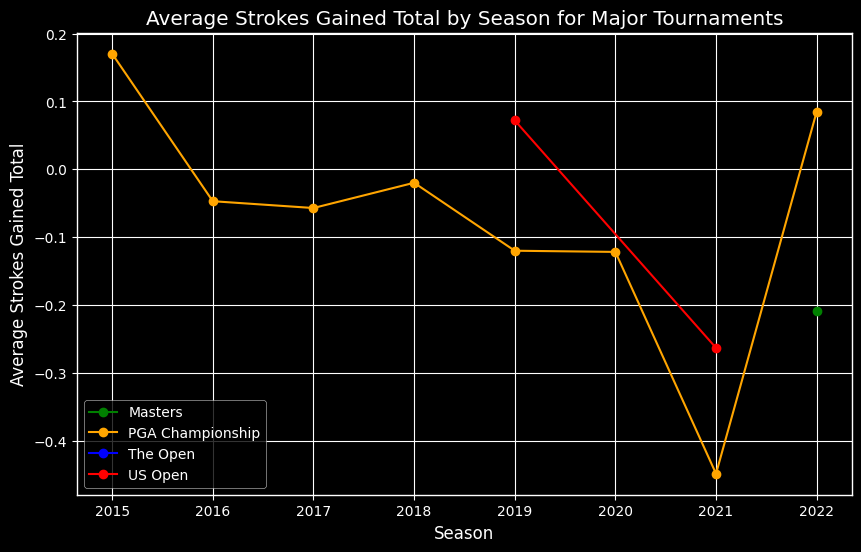

In [25]:
plt.figure(figsize=(10, 6))

sg_total_masters.plot(color='green', marker='o', linestyle='-')
sg_total_pga.plot(color='orange', marker='o', linestyle='-')
sg_total_open.plot(color='blue', marker='o', linestyle='-')
sg_total_us.plot(color='red', marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Season')
plt.ylabel('Average Strokes Gained Total')
plt.title('Average Strokes Gained Total by Season for Major Tournaments')
plt.legend(['Masters', 'PGA Championship', 'The Open', 'US Open'])

# Show plot
plt.grid(True)
plt.show()

This grid is shows all the strokes gained from the 4 Major Championships, I explained what strokes gained are earlier, which is why I decided to make another chart from it. The problem with this one not all the data was collected. Due to this the graph is missing lines which is a shame because this would've been a very revealing grapgh to show which tournament is the easiest.

### Conclusion

Overall this project was very enjoyable to do, it made me really enjoy Google Colabs and what it is used for, which was a question I had about this class for a little. My biggest take away from this project is golf as a whole is getting bigger and more people are starting to realize that. Golfers are becoming extremely talented and the field of play is better than ever. One other thing is as I reviewed my project I realized that the PGA Tour is in a huge battle with LIV Golf to hold the spot for the biggest golf league. My question is if players are so confident in winning, why are they leaving? Players are making so much money off of wins in the PGA Tour they should not have to worry yet people are still leaving. While doing this project there was things I wish I had access to, to further look deeper into. I truly wish that there was viewership in the dataset, I always find myself gravitating towards watching golf in the summer and over the winter and it would be cool if other people also did. Also when I look at my last graph it looks quite pathetic; the reason I kept it was to speak about how I wish I could have made my own dataset. I would make it on certain players that have been at the top of the leaderboard for years now, one thing I would want to do with my own dataset is find how much better my favorite player is if he was a top 10 putter in the world. I could've used if statements with it and made it real in-depth. I know it is a lot of work to collect all of the data but I truly find statistics quite interesting. So, if I could show the difference between a great putter in golf, and not the greatest putter, I would feel like I accomplished something with my own data. All in all, this project was very helpful and I hope to continue with this route of analyzing data and creating graphs with it.

### Work Cited

“PGA Tour Golf Data - (2015-2022).” Www.kaggle.com, www.kaggle.com/datasets/robikscube/pga-tour-golf-data-20152022?select=ASA+All+PGA+Raw+Data+-+Tourn+Level.csv. Accessed 30 Apr. 2024.

https://matplotlib.org/stable/gallery/lines_bars_and_markers/index.html